In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook

In [2]:
n = str(1) #chiller number
df = pd.read_csv("data/Chiller"+n+"_full.csv")
df.index = pd.to_datetime(df['ts'])
df.drop('ts', axis=1, inplace=True)
df.head()

,ch1Watt,ch2Watt,ch3Watt,value1,value2,value3,value4,conflowRate,conflowSpeed,evaflowRate,evaflowSpeed
ts,,,,,,,,,,,
2017-05-01 00:00:00,349,0,353,18.068238,20.535583,23.376769,23.387453,0.000000,0.000000,0.000000,0.00000
2017-05-01 00:01:00,383,0,396,16.166991,16.914672,22.565002,22.639772,35.284023,0.303604,0.000000,0.00000
2017-05-01 00:02:00,379,0,394,15.964052,16.722413,22.372743,22.351379,144.330154,1.241898,0.000000,0.00000
2017-05-01 00:03:00,389,0,408,17.053528,17.822570,22.265932,22.372743,195.770782,1.684522,10.812524,0.16108
2017-05-01 00:04:00,5748,4480,4942,18.559570,19.531554,22.415465,22.490235,214.631348,1.846809,77.101921,1.14863


In [ ]:
def COP_calc(row):
    total_watt=row['ch1Watt']+row['ch2Watt']+row['ch3Watt']
    if total_watt>0:
        return row['evaflowRate']*row['value1']/(total_watt)
    else:
        return 0
df['totalWatt'] = df.apply(lambda row: row['ch1Watt']+row['ch2Watt']+row['ch3Watt'], axis=1)
#df['COP'] = df.apply(lambda row: COP_calc(row), axis=1)

<IPython.core.display.Javascript object>


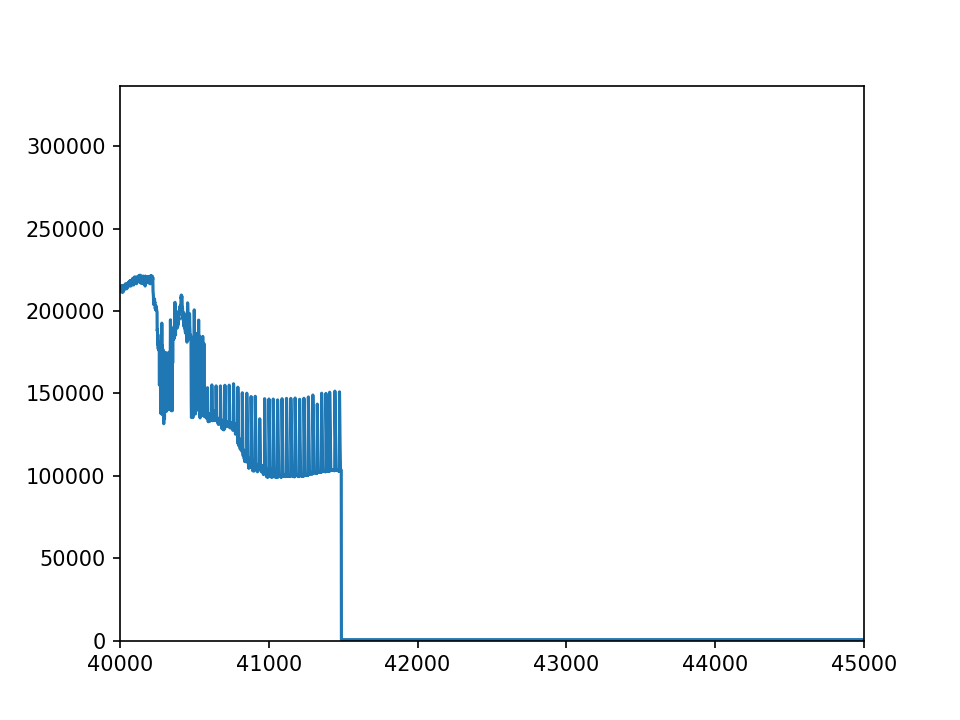

In [24]:
df['conflowRate'].hist(bins=50,color='orange')

In [11]:
df[['value1', 'value2', 'value3', 'value4', 'conflowRate', 'conflowSpeed', 'evaflowRate', 'evaflowSpeed']].corr()

,ch1Watt,ch2Watt,ch3Watt,value1,value2,value3,value4,conflowRate,conflowSpeed,evaflowRate,evaflowSpeed,totalWatt
ch1Watt,1.000000,0.999302,0.999517,-0.633461,-0.464785,0.601060,0.094468,0.920089,0.920089,0.917752,0.917752,0.999768
ch2Watt,0.999302,1.000000,0.999818,-0.620527,-0.453772,0.606403,0.102472,0.907937,0.907937,0.905529,0.905529,0.999851
ch3Watt,0.999517,0.999818,1.000000,-0.624095,-0.456839,0.604874,0.100048,0.911665,0.911665,0.909355,0.909355,0.999927
value1,-0.633461,-0.620527,-0.624095,1.000000,0.915127,-0.045745,0.379701,-0.727420,-0.727420,-0.740204,-0.740204,-0.626285
value2,-0.464785,-0.453772,-0.456839,0.915127,1.000000,0.127840,0.511398,-0.558119,-0.558119,-0.579066,-0.579066,-0.458673
value3,0.601060,0.606403,0.604874,-0.045745,0.127840,1.000000,0.806688,0.492745,0.492745,0.477903,0.477903,0.604138
value4,0.094468,0.102472,0.100048,0.379701,0.511398,0.806688,1.000000,-0.002826,-0.002826,-0.021191,-0.021191,0.098912
conflowRate,0.920089,0.907937,0.911665,-0.727420,-0.558119,0.492745,-0.002826,1.000000,1.000000,0.996550,0.996550,0.913521
conflowSpeed,0.920089,0.907937,0.911665,-0.727420,-0.558119,0.492745,-0.002826,1.000000,1.000000,0.996550,0.996550,0.913521
evaflowRate,0.917752,0.905529,0.909355,-0.740204,-0.579066,0.477903,-0.021191,0.996550,0.996550,1.000000,1.000000,0.911170


In [29]:
df=df.reset_index()
df.head()

,index,ts,ch1Watt,ch2Watt,ch3Watt,value1,value2,value3,value4,conflowRate,conflowSpeed,evaflowRate,evaflowSpeed,totalWatt
0,0,2017-05-01 00:00:00,349,0,353,18.068238,20.535583,23.376769,23.387453,0.000000,0.000000,0.000000,0.00000,702.0
1,1,2017-05-01 00:01:00,383,0,396,16.166991,16.914672,22.565002,22.639772,35.284023,0.303604,0.000000,0.00000,779.0
2,2,2017-05-01 00:02:00,379,0,394,15.964052,16.722413,22.372743,22.351379,144.330154,1.241898,0.000000,0.00000,773.0
3,3,2017-05-01 00:03:00,389,0,408,17.053528,17.822570,22.265932,22.372743,195.770782,1.684522,10.812524,0.16108,797.0
4,4,2017-05-01 00:04:00,5748,4480,4942,18.559570,19.531554,22.415465,22.490235,214.631348,1.846809,77.101921,1.14863,15170.0


In [30]:
import datetime
train = df.loc[:40000]#df.loc[:datetime.date(year=2017,month=11,day=1)]
X_train = train.drop(['ch1Watt','ch2Watt','ch3Watt','ts'],axis=1).as_matrix()
y_train = train[['ch1Watt','ch2Watt','ch3Watt']].as_matrix().sum(axis=1)

test = df.loc[40000:45000]#df.loc[datetime.date(year=2017,month=11,day=1):]
X_test = test.drop(['ch1Watt','ch2Watt','ch3Watt','ts'],axis=1).as_matrix()
y_test = test[['ch1Watt','ch2Watt','ch3Watt']].as_matrix().sum(axis=1)

In [31]:
from sklearn.ensemble import RandomForestRegressor
regr_rf = RandomForestRegressor()
regr_rf.fit(X_train, y_train)

y_rf = regr_rf.predict(X_test)

<IPython.core.display.Javascript object>


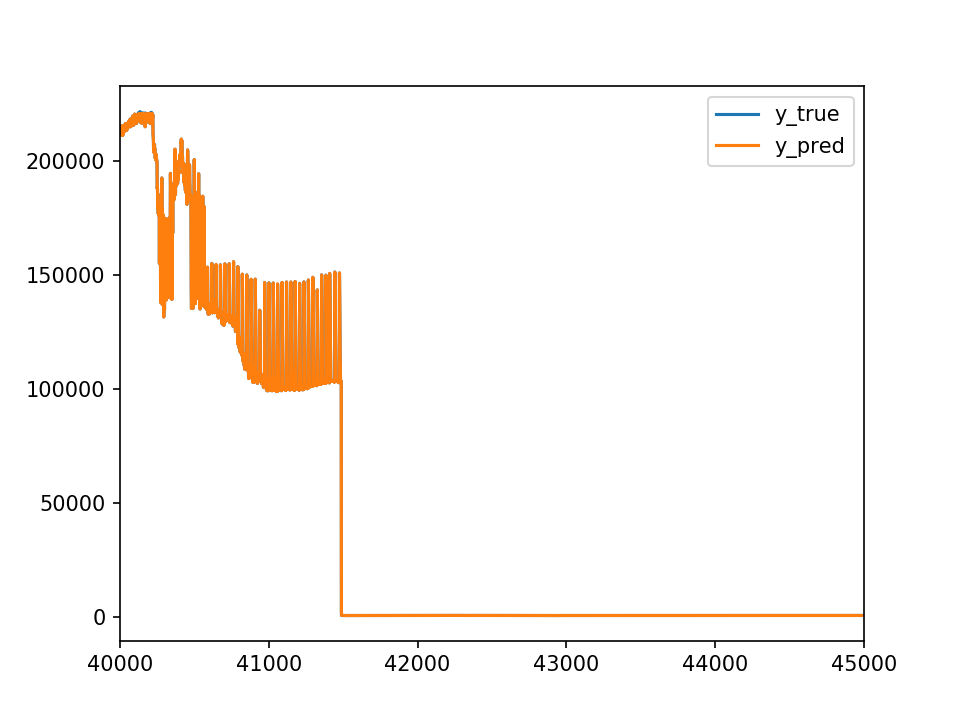

In [36]:
y_test_df = pd.DataFrame(np.concatenate((y_test.reshape((y_test.shape[0],1)), y_rf.reshape((y_rf.shape[0],1))), axis=1))
y_test_df.columns=['y_true', 'y_pred']
y_test_df.index=test.index
y_test_df.plot()

In [33]:
from sklearn.metrics import mean_absolute_error as mae
print(np.sqrt(mae(y_test, y_rf)))
y_test_df.head()

3.10197929472


,y_true,y_pred
40000,211971.0,211966.7
40001,214422.0,214423.1
40002,212943.0,212981.0
40003,213899.0,213892.4
40004,213778.0,213770.7


In [18]:
# value1	value2	value3	value4	conflowRate	conflowSpeed	evaflowRate	evaflowSpeed
regr_rf.feature_importances_

array([ 0.00482769,  0.02463941,  0.12903647,  0.00602094,  0.41692739,
        0.41684684,  0.00092405,  0.00077722])

In [21]:
df.corr()

,ch1Watt,ch2Watt,ch3Watt,value1,value2,value3,value4,conflowRate,conflowSpeed,evaflowRate,evaflowSpeed
ch1Watt,1.000000,0.999302,0.999517,-0.633461,-0.464785,0.601060,0.094468,0.920089,0.920089,0.917752,0.917752
ch2Watt,0.999302,1.000000,0.999818,-0.620527,-0.453772,0.606403,0.102472,0.907937,0.907937,0.905529,0.905529
ch3Watt,0.999517,0.999818,1.000000,-0.624095,-0.456839,0.604874,0.100048,0.911665,0.911665,0.909355,0.909355
value1,-0.633461,-0.620527,-0.624095,1.000000,0.915127,-0.045745,0.379701,-0.727420,-0.727420,-0.740204,-0.740204
value2,-0.464785,-0.453772,-0.456839,0.915127,1.000000,0.127840,0.511398,-0.558119,-0.558119,-0.579066,-0.579066
value3,0.601060,0.606403,0.604874,-0.045745,0.127840,1.000000,0.806688,0.492745,0.492745,0.477903,0.477903
value4,0.094468,0.102472,0.100048,0.379701,0.511398,0.806688,1.000000,-0.002826,-0.002826,-0.021191,-0.021191
conflowRate,0.920089,0.907937,0.911665,-0.727420,-0.558119,0.492745,-0.002826,1.000000,1.000000,0.996550,0.996550
conflowSpeed,0.920089,0.907937,0.911665,-0.727420,-0.558119,0.492745,-0.002826,1.000000,1.000000,0.996550,0.996550
evaflowRate,0.917752,0.905529,0.909355,-0.740204,-0.579066,0.477903,-0.021191,0.996550,0.996550,1.000000,1.000000


<IPython.core.display.Javascript object>


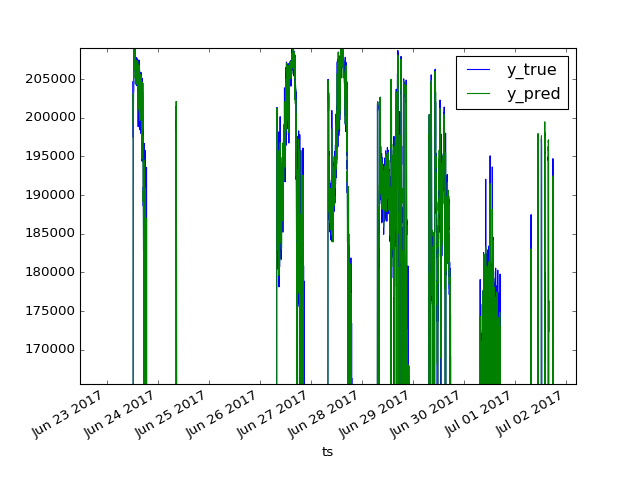

In [23]:
y_train_rf = regr_rf.predict(X_train)
y_train_df = pd.DataFrame(np.concatenate((y_train.reshape((y_train.shape[0],1)), y_train_rf.reshape((y_train_rf.shape[0],1))), axis=1))
y_train_df.columns=['y_true', 'y_pred']
y_train_df.index=train.index
y_train_df.plot()

In [32]:
np.sqrt(mse(y_train,y_train_rf))
sklearn.cluster.KMeans

1670.1562228331038

<IPython.core.display.Javascript object>


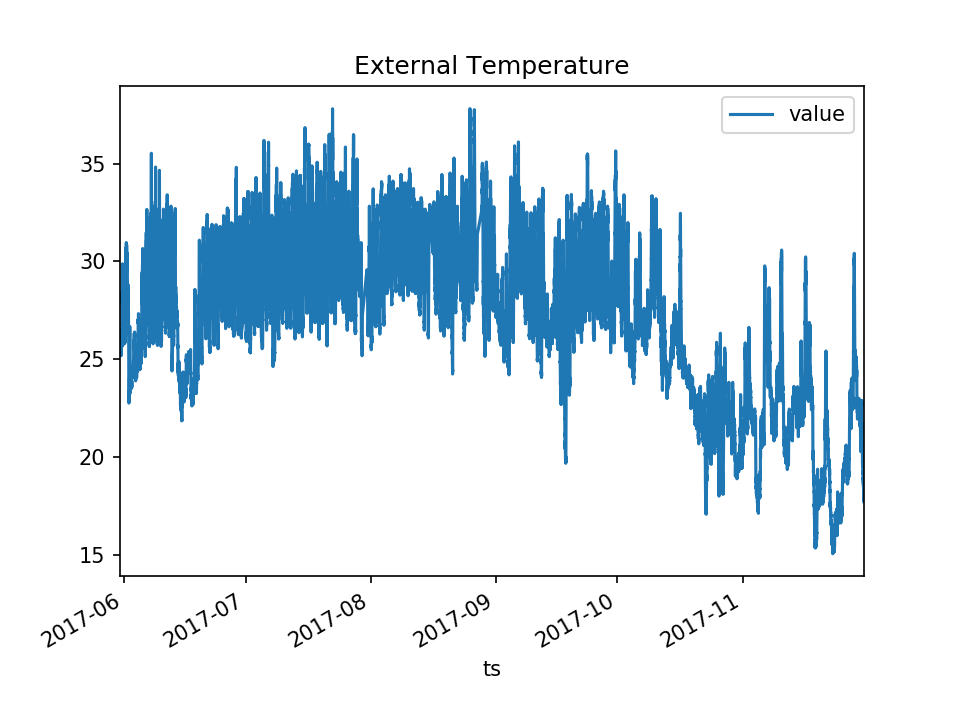

In [51]:
ext_df_may = pd.read_csv("data/ext/NUS May OAT.csv")
ext_df_jun = pd.read_csv("data/ext/NUS June OAT.csv")
ext_df_july = pd.read_csv("data/ext/NUS July OAT.csv")
ext_df_aug = pd.read_csv("data/ext/NUS August OAT.csv")
ext_df_sept = pd.read_csv("data/ext/NUS September OAT.csv")
ext_df_oct = pd.read_csv("data/ext/NUS October OAT.csv")
ext_df_nov = pd.read_csv("data/ext/NUS November OAT.csv")
ext_df=pd.concat([ext_df_may, ext_df_jun, ext_df_july, ext_df_aug, ext_df_sept, ext_df_oct,ext_df_nov])
ext_df.index = pd.to_datetime(ext_df['ts'])
ext_df[['value']].plot(title='External Temperature')